In [28]:
#Import Libraries
from generate_data_class import GenerateData
import genetic_algo_gs as gag
import kmeans
import numpy

In [29]:
#Inputs
kNo = 2

initial_centroids = gag.init_cluster_center(kNo)
fit_func = gag.fitness_func(initial_centroids)

In [30]:
#Generate Data
gy = GenerateData(kNo)
rawData = gy.raw_data()

In [31]:
_, plot_result, _, _ = gag.GeneticAlgorithm(gag.fitness_func,kNo,100)

Generation #-1   |fitness: 0.00256 |Centroid = [ 2.2  3.3  9.9 16.5]
Generation #0   |fitness: 0.00135 |Centroid = [1.8 1.7 1.3 0.5]
Generation #1   |fitness: 0.00131 |Centroid = [1.6 1.4 0.2 0.5]
Generation #2   |fitness: 0.00133 |Centroid = [1.6 1.7 0.1 0. ]
Generation #3   |fitness: 0.00135 |Centroid = [1.8 1.7 0.1 0. ]
Generation #4   |fitness: 0.00133 |Centroid = [1.8 1.4 1.2 1. ]
Generation #5   |fitness: 0.00133 |Centroid = [1.8 1.4 0.1 1. ]
Generation #6   |fitness: 0.00135 |Centroid = [1.8 1.7 1.1 0. ]
Generation #7   |fitness: 0.00133 |Centroid = [1.6 1.7 0.1 1.5]
Generation #8   |fitness: 0.00133 |Centroid = [1.6 1.7 0.1 0.5]
Generation #9   |fitness: 0.00133 |Centroid = [1.6 1.7 0.1 0. ]
Generation #10   |fitness: 0.00129 |Centroid = [0.6 1.4 1.3 1.5]
Generation #11   |fitness: 0.00125 |Centroid = [1.6 0.7 0.1 0.5]
Generation #12   |fitness: 0.00127 |Centroid = [1.4 1.1 0.1 0.5]
Generation #13   |fitness: 0.00127 |Centroid = [1.4 1.1 1.2 0.5]
Generation #14   |fitness: 0.00

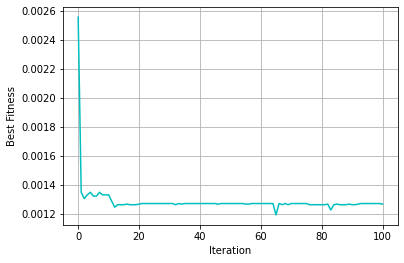

In [35]:
gag.display_plot(plot_result)

In [33]:
def kmean_data(data):
    l = []
    for el in data:
        l2 = []
        l2.append(el[0][0])
        l2.append(el[1][0])
        l.append(numpy.array(l2))

    return numpy.array(l)

model = kmeans.KMeans(kNo)
data1 = kmean_data(gy.raw_data())
model.fit(data1)
ml = model.to__solution()
print(f'Fitness value of K-Means output is: {gag.fitness_func(numpy.array([ml]))[0]:0.5f}')

Fitness value of K-Means output is: 0.00236


Plots for k-means fitness

[[array([ 9.12318621, 15.04341299]), array([1.78621   , 8.32856451])], [array([ 8.02969493, 15.78195691]), array([1.84327026, 4.14331831])]]


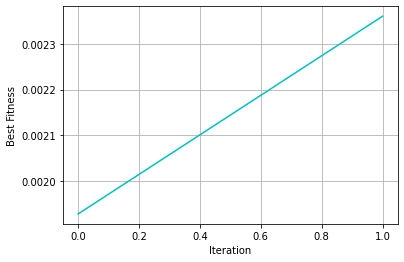

In [36]:
ko = model.evolution
print(ko)
lp = []
kmean_fitness_list = []
""" for i in range(len(ko)):
    yi = []
    for j in range(kNo):
        for u in range(2):
            yi.append(ko[i][j][u])
    lp.append(yi)
kmean_fitness_list.append(gag.fitness_func(numpy.array(lp))) """ 
# output = [[22.92760991 66.39547585 23.13308962 55.7433142 7.91369287 17.73000917],[],[],[]] []
ti = []
for el in ko: 
    yo = []   
    for subel in el:
        yo.append(subel[0])
        yo.append(subel[1])
    ti.append(numpy.array(yo))
ti = numpy.array(ti)
#print(f'ti is: {ti}')

#plot kmeans fitness evolution
#print(ko)
io = gag.fitness_func(ti)
#print(ti.tolist())
gag.display_plot(io.tolist())
